In [1]:
# import libraries and data
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
data = pd.read_csv('cookie_cats.csv')

In [2]:
# add mock age groups to dataset
age_group_code = pd.Series(np.random.randint(1, 8, data.shape[0]))
age_group_dict = {1: "0-18 years", 
                  2: "19-24 years", 
                  3: "25-30 years", 
                  4: "30-36 years", 
                  5: "37-45 years", 
                  6: "46-55 years", 
                  7: "55+ years"}
data['age_group'] = age_group_code.map(age_group_dict)

In [3]:
# add mock marketing channel to dataset
marketing_channel_code = pd.Series(np.random.randint(1, 6, data.shape[0]))
marketing_channel_dict = {1: "Facebook", 
                          2: "Instagram", 
                          3: "Push", 
                          4: "Google", 
                          5: "Email"}
data['marketing_channel'] = marketing_channel_code.map(marketing_channel_dict)

In [4]:
# add mock subscription date to dataset
data['subscribed'] = np.random.randint(1, 16, data.shape[0])
data['subscribed'] = data.apply(lambda x: '2023-11-' + str(x['subscribed']) \
                                if len(str(x['subscribed'])) == 2 \
                                else '2023-11-0' + str(x['subscribed']), axis=1)
data['subscribed'] = pd.to_datetime(data['subscribed'], format='%Y-%m-%d')
# we will count retention_1 column as subscription
data.rename(columns={'retention_1':'converted'}, inplace=True)
data.head()

,userid,version,sum_gamerounds,converted,retention_7,age_group,marketing_channel,subscribed
0,116,gate_30,3,False,False,46-55 years,Google,2023-11-03
1,337,gate_30,38,True,False,55+ years,Instagram,2023-11-08
2,377,gate_40,165,True,False,30-36 years,Push,2023-11-11
3,483,gate_40,1,False,False,19-24 years,Push,2023-11-08
4,488,gate_40,179,True,True,37-45 years,Facebook,2023-11-06


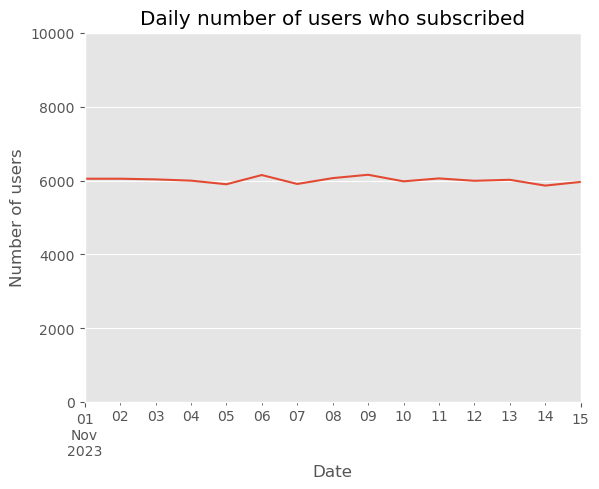

In [5]:
# aggregate unique users that subscribed by date
daily_users = data.groupby('subscribed')['userid'].nunique()
# plot
daily_users.plot()
# annotate 
plt.title('Daily number of users who subscribed')
plt.xlabel('Date')
plt.ylabel('Number of users')
plt.ylim(0, 10000)
plt.show()

In [12]:
# calculate conversion rate for both versions
gate_30_converted = data[(data['version'] == 'gate_30') & (data['converted'] == True)]['userid'].nunique()
gate_40_converted = data[(data['version'] == 'gate_40') & (data['converted'] == True)]['userid'].nunique()

gate_30_total = data[data['version'] == 'gate_30']['userid'].nunique()
gate_40_total = data[data['version'] == 'gate_40']['userid'].nunique()

print(f"Conversion rate for version gate_30 is {round(gate_30_converted / gate_30_total * 100, 2)}%")
print(f"Conversion rate for version gate_40 is {round(gate_40_converted / gate_40_total * 100, 2)}%")

Conversion rate for version gate_30 is 44.82%
Conversion rate for version gate_40 is 44.23%


In [14]:
# calculate retention rate for both versions
gate_30_retained = data[(data['version'] == 'gate_30') & (data['retention_7'] == True)]['userid'].nunique()
gate_40_retained = data[(data['version'] == 'gate_40') & (data['retention_7'] == True)]['userid'].nunique()

print(f"Retention rate for version gate_30 is {round(gate_30_retained / gate_30_converted * 100, 2)}%")
print(f"Retention rate for version gate_40 is {round(gate_40_retained / gate_40_converted * 100, 2)}%")

Retention rate for version gate_30 is 42.44%
Retention rate for version gate_40 is 41.15%
